In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime as dt
import json
from pprint import pprint
from config import api_key
from citipy import citipy

In [2]:
#otdays date
today=dt.datetime.today().strftime("%m/%d/%Y")


In [3]:
# Output File (CSV)
output_data_file = "cities.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
#generating random lats and longs
lat_lng=[]
cities=[]
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

In [5]:
#generating cities list based on lat & long
lat_lng=zip(lats,lngs)
for val in lat_lng:
    city = citipy.nearest_city(val[0], val[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [6]:
weather_df=pd.DataFrame(cities)
#weather_df=weather_df.iloc[:5,]
weather_df.rename(columns={0:"city"},inplace=True)

In [7]:

def w_data(o):
    url = "http://api.openweathermap.org/data/2.5/weather?"
    params={
        "units":"imperial",
        "APPID":api_key,
        "q":o
    }
    response1=requests.get(url,params=params)
    try:
        response=response1.json()
        if response['cod']==200:
            print (f'Processing Record of {o}....')
            return response
        else:
           print (f'Skipping Record of {o} (Record not found)...') 
    except Exception as e:
            print(f'{type(e)} as {e}')
            return np.nan

#w_data("Austin")

In [8]:

weather_df["results"]= weather_df["city"].map(lambda x: w_data(x))



Processing Record of busselton....
Processing Record of diffa....
Processing Record of tasiilaq....
Processing Record of flinders....
Processing Record of malim....
Processing Record of codrington....
Processing Record of yellowknife....
Processing Record of sao filipe....
Skipping Record of malwan (Record not found)...
Skipping Record of saleaula (Record not found)...
Skipping Record of vaitupu (Record not found)...
Processing Record of bowen....
Skipping Record of taolanaro (Record not found)...
Processing Record of kloulklubed....
Skipping Record of illoqqortoormiut (Record not found)...
Processing Record of bluff....
Processing Record of puerto ayora....
Skipping Record of tsihombe (Record not found)...
Processing Record of lebu....
Processing Record of mar del plata....
Processing Record of victoria....
Processing Record of labuhan....
Processing Record of seoul....
Skipping Record of catamarca (Record not found)...
Processing Record of roma....
Processing Record of palmer....
Pro

Processing Record of blagoyevo....
Processing Record of nisia floresta....
Processing Record of hasaki....
Skipping Record of falealupo (Record not found)...
Processing Record of watsa....
Processing Record of harwich....
Processing Record of akureyri....
Processing Record of placido de castro....
Processing Record of sola....
Processing Record of saldanha....
Processing Record of ashland....
Skipping Record of bengkulu (Record not found)...
Processing Record of iqaluit....
Processing Record of lahore....
Processing Record of madimba....
Processing Record of airai....
Processing Record of tomatlan....
Processing Record of mangrol....
Processing Record of la palma....
Processing Record of atuona....
Processing Record of sao paulo de olivenca....
Processing Record of aripuana....
Processing Record of katobu....
Processing Record of port macquarie....
Processing Record of fortuna....
Processing Record of fairbanks....
Processing Record of qujing....
Processing Record of kodiak....
Process

Processing Record of ballangen....
Processing Record of biak....
Processing Record of los llanos de aridane....
Processing Record of gornopravdinsk....
Processing Record of inongo....
Processing Record of northam....
Processing Record of kangavar....
Skipping Record of tawnat (Record not found)...
Processing Record of galesong....
Processing Record of leirvik....
Processing Record of damghan....
Processing Record of krosno odrzanskie....
Processing Record of kidal....
Processing Record of khani....
Skipping Record of pingzhuang (Record not found)...
Skipping Record of urdzhar (Record not found)...
Processing Record of gubkinskiy....
Processing Record of mirabad....
Processing Record of samarai....
Processing Record of neryungri....
Processing Record of vaijapur....
Processing Record of nyuksenitsa....
Processing Record of isla vista....
Processing Record of chaska....
Processing Record of kavaratti....
Processing Record of mitsamiouli....
Processing Record of bilibino....
Processing Re

In [9]:
#drop row with missing value
weather_df=weather_df.dropna().reset_index(drop=True)

weather_df["Cloudiness"]=weather_df["results"].map(lambda x: x["clouds"]["all"])
weather_df["Country"]=weather_df["results"].map(lambda x: x['sys']["country"])
weather_df["Date"]=weather_df["results"].map(lambda x: x['dt'])
weather_df["Humidity"]=weather_df["results"].map(lambda x: x["main"]["humidity"])
weather_df["Lat"]=weather_df["results"].map(lambda x: x['coord']['lat'])
weather_df["Lng"]=weather_df["results"].map(lambda x: x['coord']['lon'])
weather_df["Max_Temp"]=weather_df["results"].map(lambda x: x["main"]["temp_max"])
weather_df["Wind_Speed"]=weather_df["results"].map(lambda x: x["wind"]['speed'])


weather_df.drop("results",axis=1,inplace=True)
#weather_df=weather_df.iloc[:500,]
#total columns and row count
weather_df.count(axis=0)

city          570
Cloudiness    570
Country       570
Date          570
Humidity      570
Lat           570
Lng           570
Max_Temp      570
Wind_Speed    570
dtype: int64

In [10]:
# write to csv file
with open(output_data_file,"w") as f:
    weather_df.to_csv(f,index=False)

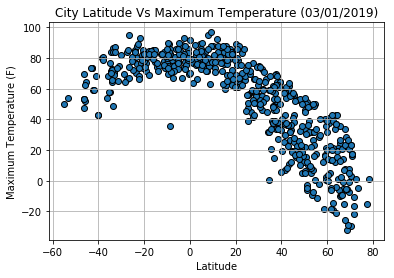

In [11]:
#City Latitude Vs Maximum Temperature
x_axis=weather_df["Lat"]
y_axis=weather_df["Max_Temp"]
plt.scatter(x_axis,y_axis,marker='o',edgecolors="black")
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
plt.title(f'City Latitude Vs Maximum Temperature ({today})')
plt.grid()
plt.savefig("scatter1.png")
plt.show()

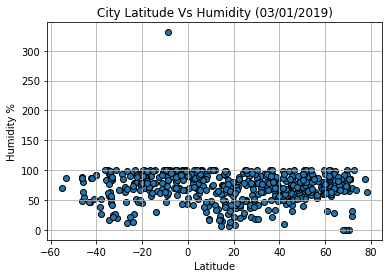

In [12]:
#City Latitude Vs Humidity%
x_axis=weather_df["Lat"]
y_axis=weather_df["Humidity"]
plt.scatter(x_axis,y_axis,marker='o',edgecolors="black")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.title(f'City Latitude Vs Humidity ({today})')
plt.grid()
plt.savefig("scatter2.png")
plt.show()

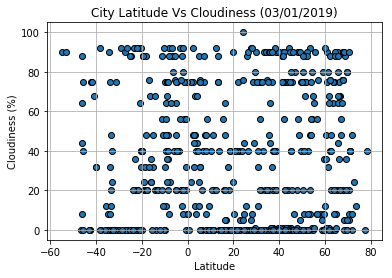

In [13]:
#City Latitude Vs cloudiness%
x_axis=weather_df["Lat"]
y_axis=weather_df["Cloudiness"]
plt.scatter(x_axis,y_axis,marker='o',edgecolors="black")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title(f'City Latitude Vs Cloudiness ({today})')
plt.grid()
plt.savefig("scatter3.png")
plt.show()

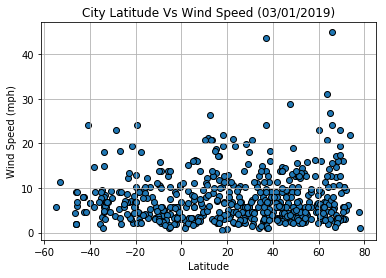

In [14]:
#City Latitude Vs Wind speed
x_axis=weather_df["Lat"]
y_axis=weather_df["Wind_Speed"]
plt.scatter(x_axis,y_axis,marker='o',edgecolors="black")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title(f'City Latitude Vs Wind Speed ({today})')
plt.grid()
plt.savefig("scatter4.png")
plt.show()

In the first graph, although the cities are at the same distance from equator but the ones in minus lat have high temp.
In second graph, at any lat we find cities with 100 % humidity although between 20-40 we have few cities with dry zones on both sides.
In the third graph, there is uniform distribution no correlation can be found.
in the fourth graph, there are 2 cities with more than wind speed more than 40mph, could be random.